## Content
- Code for Univariate LR using Scikit Learn
- Multivariate Linear Regression
- Problems with R-squared, Adjusted R-squared
- Model interpretibiity and Feature importance

## Code for Univariate LR using Scikit Learn

#### Previously Done

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltf

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 243MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

selling_price      year  km_driven   mileage    engine  max_power  \
0      -1.111046 -0.801317   1.195828  0.045745 -1.310754  -1.157780   
1      -0.223944  0.450030  -0.737872 -0.140402 -0.537456  -0.360203   
2      -0.915058 -1.426990   0.035608 -0.582501 -0.537456  -0.404885   
3      -0.892365 -0.801317  -0.409143  0.329620 -0.921213  -0.693085   
4      -0.182683  0.137194  -0.544502  0.760085  0.042999   0.010435   

        age      make     model  Individual  Trustmark Dealer    Diesel  \
0  0.801317 -0.433854 -1.125683    1.248892         -0.098382 -0.985275   
1 -0.450030 -0.327501 -0.333227    1.248892         -0.098382 -0.985275   
2  1.426990 -0.327501 -0.789807    1.248892         -0.098382 -0.985275   
3  0.801317 -0.433854 -0.905265    1.248892         -0.098382 -0.985275   
4 -0.137194 -0.246579 -0.013096   -0.800710         -0.098382  1.014945   

   Electric       LPG    Petrol    Manual         5        >5  
0 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
1 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
2 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
3 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
4 -0.020095 -0.056917 -0.975970  0.495818  0.444503 -0.424728

In [ ]:
# define X and y
X = df["model"].values
Y = df["selling_price"].values

In [ ]:
def r2_score(Y,Y_hat):
    num = np.sum((Y-Y_hat)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1 - num/denom)
    return score

#### Scikit-learn
- Though we have already implemented Linear Regression model from scratch,
- We have a library which does it for us and provides key insights such as weights of the model, performance of the model.


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

- Notice how ```model``` is just an object of Linear Regression Class
- Recall when implementing from scratch, how we used ```gradent_descent()``` for X number of epochs to train our Linear Regression model



####**How to train the model using LinearRegression class?**
- Scikit-learn provides an inbulit [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method to train the model



In [ ]:
model.fit(X,Y)

ValueError: ignored

- But when we used fit method on our X and Y, it gave a shape error

#### **Why was there shape error when using fit method?**
- the documentation for fit method says:
  - X (array-like, sparse matrix) of shape (n_samples,n_features)
  - Y (array-like, sparse matrix) of shape (n_samples,) or (n_samples, n_features)

Lets check our X and Y:

In [ ]:
print(X.shape,Y.shape)

(19820,) (19820,)


- Notice how X and Y shapes are incompatible with the Scikit learn fit method




reshaping X, Y to the required shape

In [ ]:

X = X.reshape(X.size, 1)
Y = Y.reshape(Y.size, 1)

print(X.shape,Y.shape)

(19820, 1) (19820, 1)


Since now our Data is in required shape

- Now lets fit the model

In [ ]:
model.fit(X,Y)

LinearRegression()

Now that our model is trained,

#### How do we see the predictions of the trained **model** object?

In [ ]:
y_hat = model.predict(X)

print('Predicted')
print(y_hat[:3])
print('Actual')
print(Y[:3])

Predicted
[[-1.08634131]
 [-0.32158118]
 [-0.76220457]]
Actual
[[-1.11104589]
 [-0.22394353]
 [-0.91505816]]


#### What are the learnt parameters?

In [ ]:
w0 = model.intercept_
w1 = model.coef_
print(w0, w1)

[-1.18731936e-16] [[0.96505112]]


- recall from the previous lecture
  - w0, w1 = [6.6445724  4.79421248]
- Notice how scikit-learn did all the implementation much quickly and with less code.

Lets see how our LR model performed

Visualising Predictions

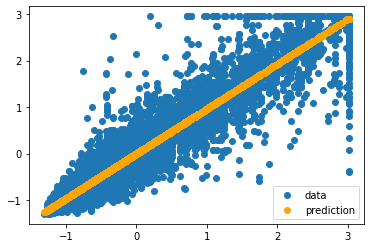

In [ ]:
fig = plt.figure()
plt.scatter(X,Y,label='data')
plt.scatter(X,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

#### How do we get the performance metric for our model?


```score``` Returns the coefficient of determination of the prediction ($R^2$)

In [ ]:
model.score(X,Y)

0.9313236629576508

- Notice how we got the similar $R^2$ value as when implemented from scratch
- Shows how Scikit-learn did the same things which we implemented but making the code simple

#### Does $R^2$ = 0.93, suggests our model good?
Ans: Yes, it means that our Univariate LR model performed much better than a mean model

####But can we be sure by just One Feature, we can estimate the selling price of a Car?####
- No, hence we will now look into more features, and how to perform Linear Regression on them


## Multivariate Linear Regression

#### Code for Multivariate LR from Scratch


Lets consider all of the features of Cars24 data to predict the selling price

#### **What will be our Linear Regression model hypothesis?**
Before starting, let's simplify our notation a bit, let's define another variable
$x_0 = 1$ :

$h(x) = w_0x_0 + w_1x_1 + w_2x_2 ...... w_nx_n = ∑_{i=0}^{i=n} w_ix_i = W^TX   $

- Now, both $W$  and $X$  are vectors, and thus, dot product ```np.dot()``` can be used.

- Note that $W$  and $X$ are $n+1$  dimensional vectors, and $i$  ranges from $0 → n $.


In [ ]:
df.head()

selling_price      year  km_driven   mileage    engine  max_power  \
0      -1.111046 -0.801317   1.195828  0.045745 -1.310754  -1.157780   
1      -0.223944  0.450030  -0.737872 -0.140402 -0.537456  -0.360203   
2      -0.915058 -1.426990   0.035608 -0.582501 -0.537456  -0.404885   
3      -0.892365 -0.801317  -0.409143  0.329620 -0.921213  -0.693085   
4      -0.182683  0.137194  -0.544502  0.760085  0.042999   0.010435   

        age      make     model  Individual  Trustmark Dealer    Diesel  \
0  0.801317 -0.433854 -1.125683    1.248892         -0.098382 -0.985275   
1 -0.450030 -0.327501 -0.333227    1.248892         -0.098382 -0.985275   
2  1.426990 -0.327501 -0.789807    1.248892         -0.098382 -0.985275   
3  0.801317 -0.433854 -0.905265    1.248892         -0.098382 -0.985275   
4 -0.137194 -0.246579 -0.013096   -0.800710         -0.098382  1.014945   

   Electric       LPG    Petrol    Manual         5        >5  
0 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
1 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
2 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
3 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
4 -0.020095 -0.056917 -0.975970  0.495818  0.444503 -0.424728

**Getting X and Y**
- Removing the selling price and taking rest of the features in X

In [ ]:
X = df[df.columns.drop('selling_price')]
Y = df["selling_price"]

Convert X and Y from dataframes to numpy array

In [ ]:
X = X.to_numpy()
Y = Y.to_numpy()

In [ ]:
print(X.shape, Y.shape)

(19820, 17) (19820,)


**Adding $x_0$ feature to X**

In [ ]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

In [ ]:
print(X.shape)

(19820, 18)


#### Multivariate Linear Regression

In [ ]:
def hypothesis(X,weight):
    return np.dot(X,weight)

**Mean Squared Error**

#### **How does the Error Function change?**
No change in the function, earlier one data point was one feature, now one data point has multiple features. Use the same MSE loss function.

In [ ]:
def error(X,y,weight):
    e = 0.0
    m = X.shape[0]
    y_hat = hypothesis(X,weight)
    e = np.sum((y-y_hat)**2)
    return e/m

Gradient Calculation

#### How does the Gradient Descent change for multiple features?
- Lets first recall from gradient descent univariate topic




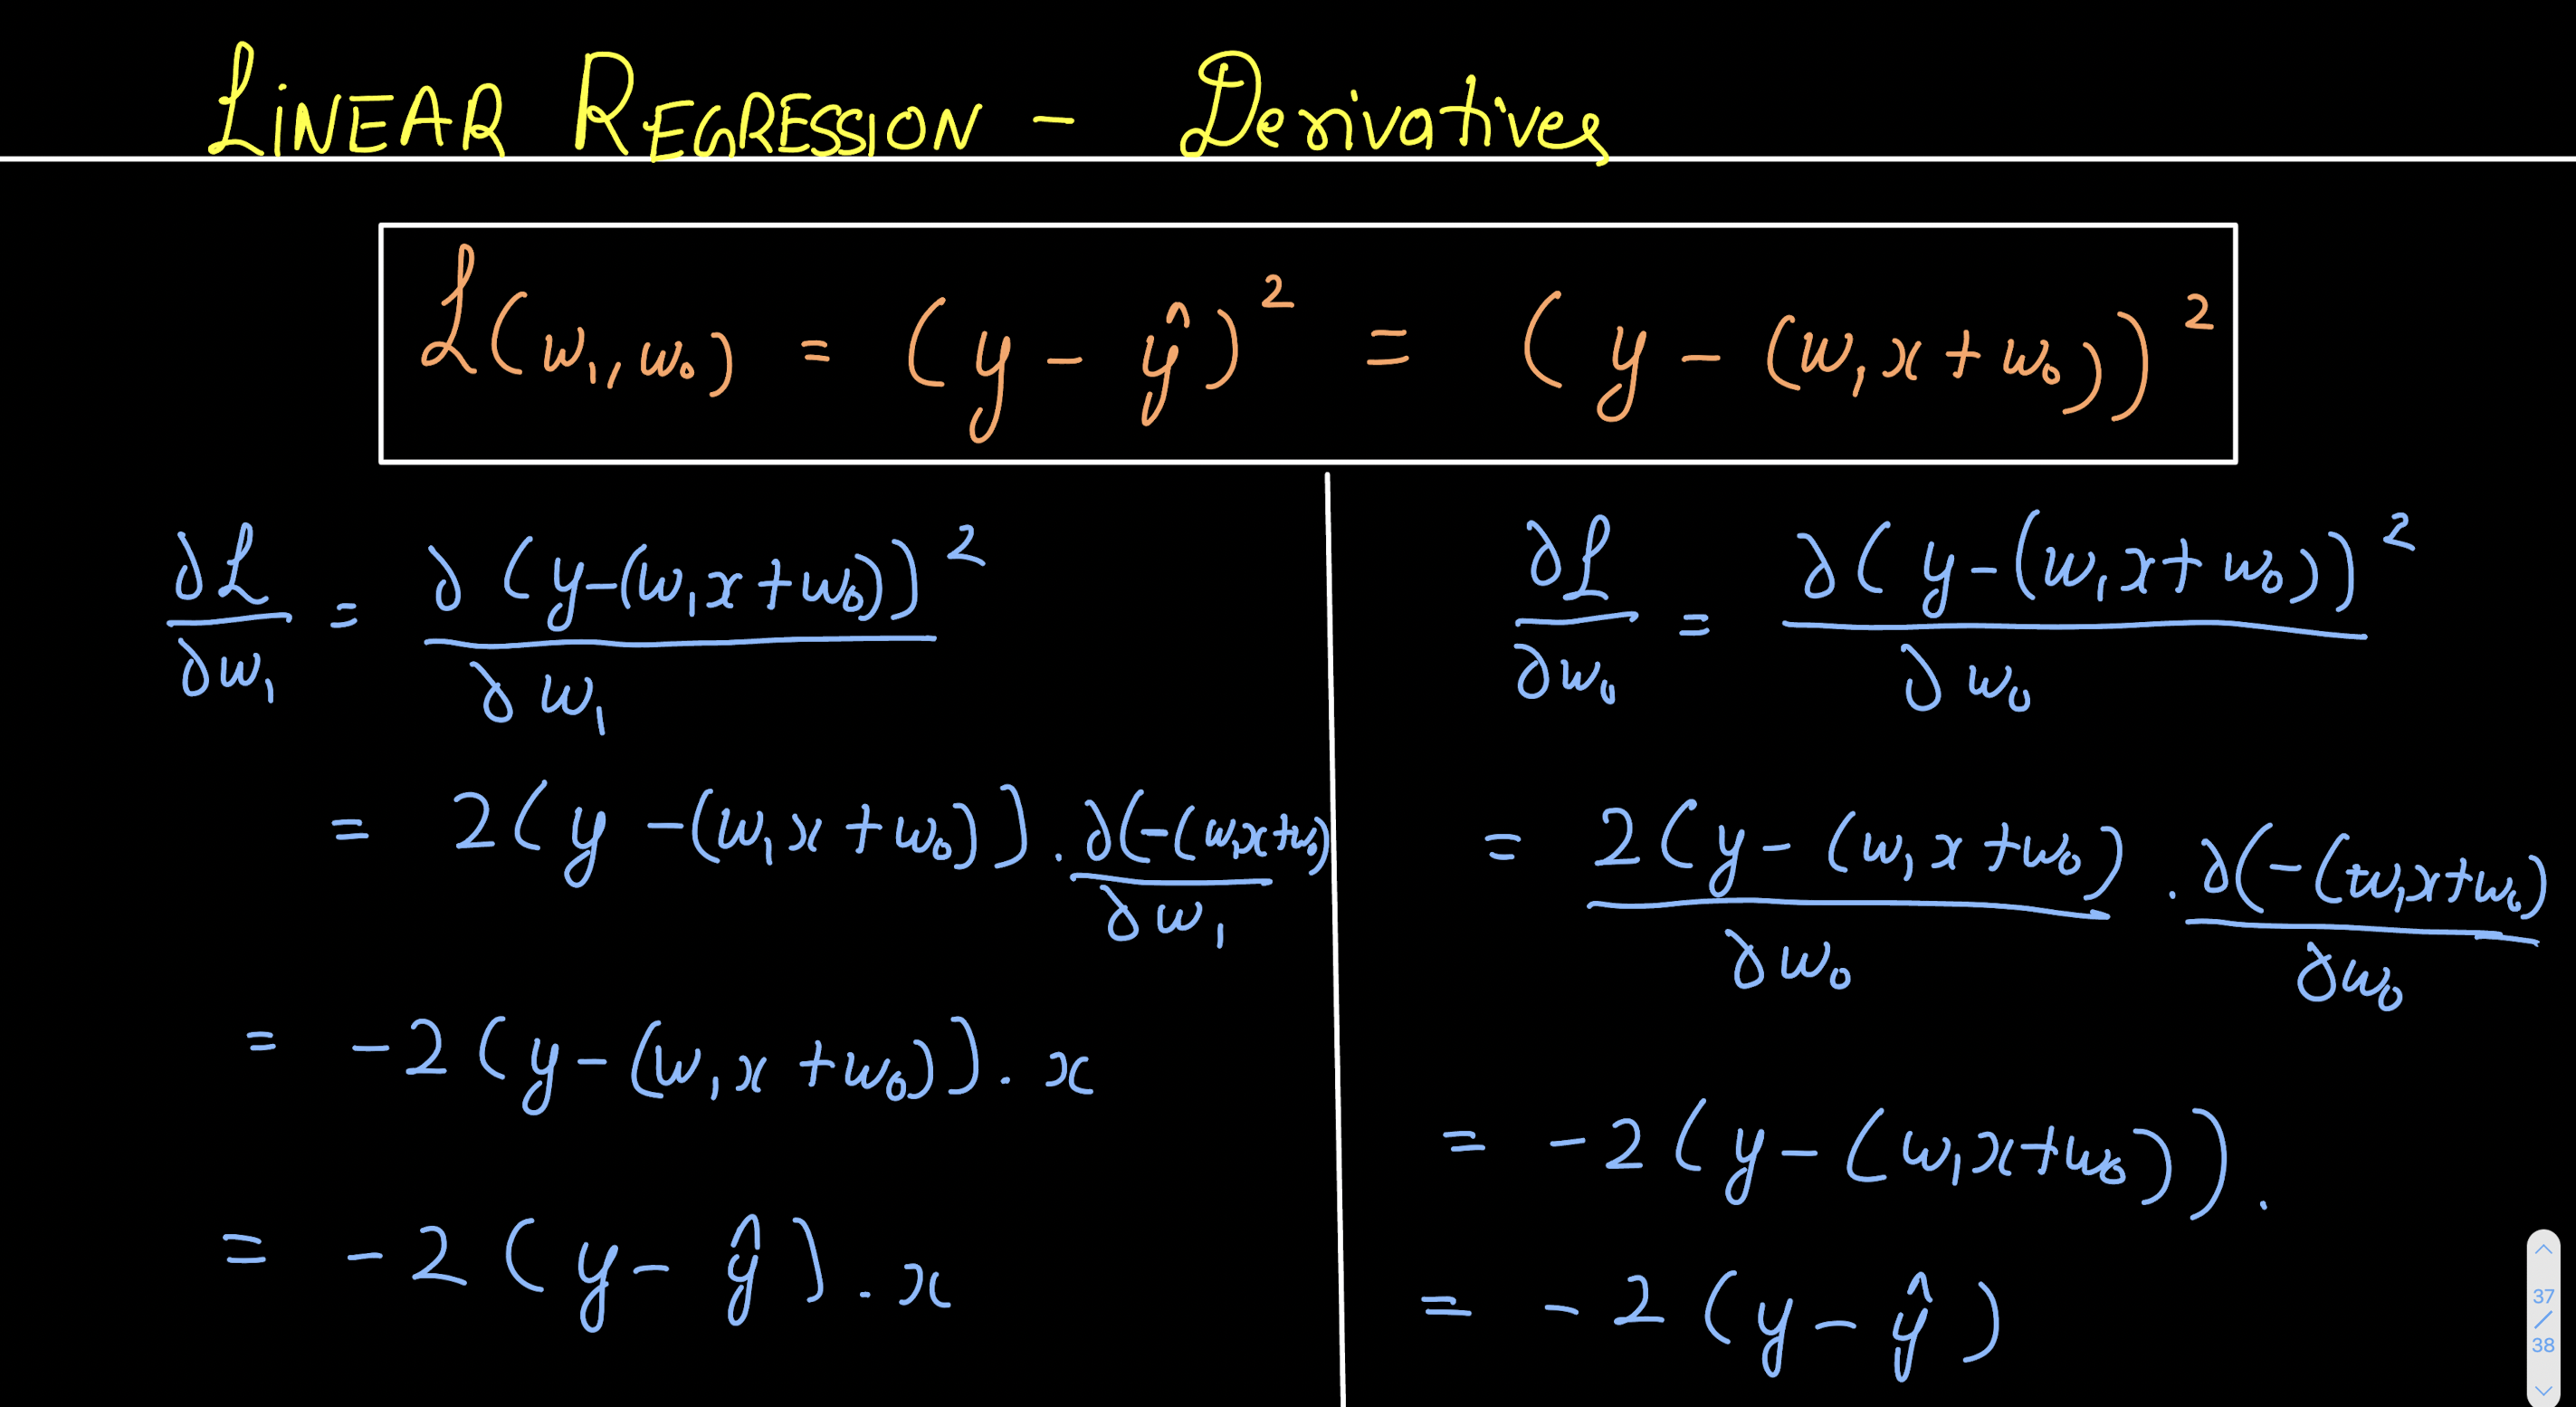

To calculate the gradients, we have to find partial derivatives of the los w.r.t various parameters w's.


$ \frac{∂J}{∂w_i} = \frac{1}{2n} \frac{\partial ∑_{i=1}^{i=n}(y_i-h(x_i))^2 }{∂w_i} $

Where
  - n is the number of samples
  - h(x) is the hypothesis function defined as :
  $ ∑_{j=0}^{j=d} w_jx_j $

Notice, we used the same equation for calculation derivatives w.r.t w0 and w1.


Now, lets generalise this for any $w_j$

Taking the $\partial$ under the summation
  - Equation now becomes:
    - $ \frac{∂J}{∂w_j} = \frac{1}{2n} ∑_{i=1}^{i=n} \frac{\partial (y_i-h(x_i))^2 }{∂w_j} $

Recall from calculas, if $y=u^2$, then $\frac{dy}{du} = 2u$
- now equation becomes:
    - $ \frac{∂J}{∂w_j} = \frac{1}{2n} ∑_{i=1}^{i=n}2(y_i-h(x_i)) \frac{\partial (y_i-h(x_i)) }{∂w_j} $

Since $h(x) = ∑_{j=0}^{j=d} w_jx_j $
- Equation becomes:
  - $ \frac{∂J}{∂w_j} = \frac{1}{2n} ∑_{i=1}^{i=n}2(y_i-h(x_i)) \frac{\partial (y_i-∑ _{j=0}^{j=d}w_{ij}x_{ij}) }{∂w_j} $

If $ y = -au $, where a is a constant, then $\frac{dy}{du} = -a $
- Equation becomes:
  - $ \frac{∂J}{∂w_j} = \frac{1}{n} ∑_{i=1}^{i=n}(y_i-h(x_i))(-x_{ij}) $











In [ ]:
def gradient(X,y,weight):

    y_hat = hypothesis(X,weight)
    grad = np.dot(X.T,(y_hat - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,epochs=500):

    n = X.shape[1]
    weight = np.zeros((n,))
    error_list = []

    for i in range(epochs):
        e = error(X,y,weight)
        error_list.append(e)

        #Gradient descent
        grad = gradient(X,y,weight)
        weight = weight - learning_rate*grad

    return weight, error_list

In [ ]:
import time
start = time.time()
weight, error_list = gradient_descent(X,Y)
end = time.time()
print("Time taken is ", end-start)

Time taken is  0.29478025436401367


**What are the learnt parameters?**

In [ ]:
print(weight)

[-7.18788186e-17  6.49606223e-02 -1.82895655e-02 -4.83430286e-02
  3.02408637e-02  2.89670964e-02 -6.49606223e-02  6.15011893e-02
  7.92870481e-01 -1.69511557e-02 -3.43943374e-03  1.56662107e-02
  1.28017113e-02  3.01544203e-03 -2.09812350e-02 -1.31123716e-02
 -1.88085889e-02 -2.61485794e-02]


**How does the error change during training?**


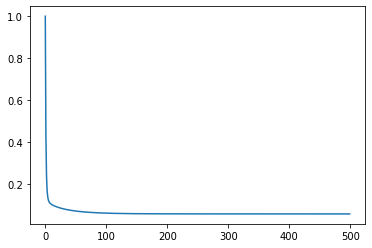

In [ ]:
fig = plt.figure()
plt.plot(error_list)
plt.show()

**What are predictions for X?**


In [ ]:
Y_hat = hypothesis(X,weight)

**How does the model perform ?**

In [ ]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

In [ ]:
r2_score(Y,Y_hat)

0.9421852544960344

## Problems with R-squared, Adjusted R-squared

Imagine adding one extra feature/predictor to your model

And lets say that feature is not a good predictor example - third party infotainment system in a car

Of course, the trained model will assign very small weight to this fearture

#### But what do you think, what happens to R-squared as we add a feature?

Case1: Feature is a relevant predictor = R-sqauared will increase (trivial) \
Case2: Feature is not a  relevant predictor = ???

#### What do you think, it will decrease, increase or remain same?

It **would have decreased if model would start performing worse** by adding a feature

But model can just assign a small or zero weight to handle that case.

#### So, will it increase or remain same?

- In reality, both are possible.
- Sometimes, model starts making "spurious associations" during training
- It assigns some weights to irrelevant features and hence R-sqaured "increases a bit"

#### But what do we want? What is our final aim?

**Pick a complex model (with more features) only IF it actually improves the performance**

#### But why more features is a problem?

Remember, **no of samples (m) >> no of features (d)** for good training



Lets try to change the formula for R-squared a bit

Somehow, **we have to compare performance v/s model complexity (no. of features)**

Consider the equation $1 - [\frac{(1-R^2)(m-1)}{(m-d-1)}]$


**Case: d increases, but not significant changed in R-sq**


  - If d increases, (m-d-1) will decrease, $[\frac{(1-R^2)(m-1)}{(m-d-1)}]$ will increase
  - Since, there is no increase in $R^2$ due to performance gain, $1 - [\frac{(1-R^2)(m-1)}{(m-d-1)}]$ will decrease.

**Case: d increases but with significant changes in performance (R-sq)**

  - If d increases, (m-d-1) will decrease, $[\frac{(1-R^2)(m-1)}{(m-d-1)}]$ will increase
  - Since, there is there is an increase in $R^2$ due to performance gain, $ [\frac{(1-R^2)(m-1)}{(m-d-1)}]$ will decrease overall, and  $1 - [\frac{(1-R^2)(m-1)}{(m-d-1)}]$ will increase


This equation is called Adjusted R-squared.

Lets define it formally

#### Adjusted R-sqaured

The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model. It is calculated as:

$ Adj R^2 = 1- [(1-R^2)\frac{(m-1)}{(m-d-1)} ]$

where:
- m: the number of samples
- d: the numner of features

In [ ]:
Adj_R = 1 - (1-r2_score(Y,Y_hat))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R-squared:", Adj_R )

Adjusted R-squared: 0.9421326982908391


- We see how our multivariate LR performed better than Univariate LR

## Model Interpretibility and Feature Importance

Now that you've made the model. How do you make sense out of it ?

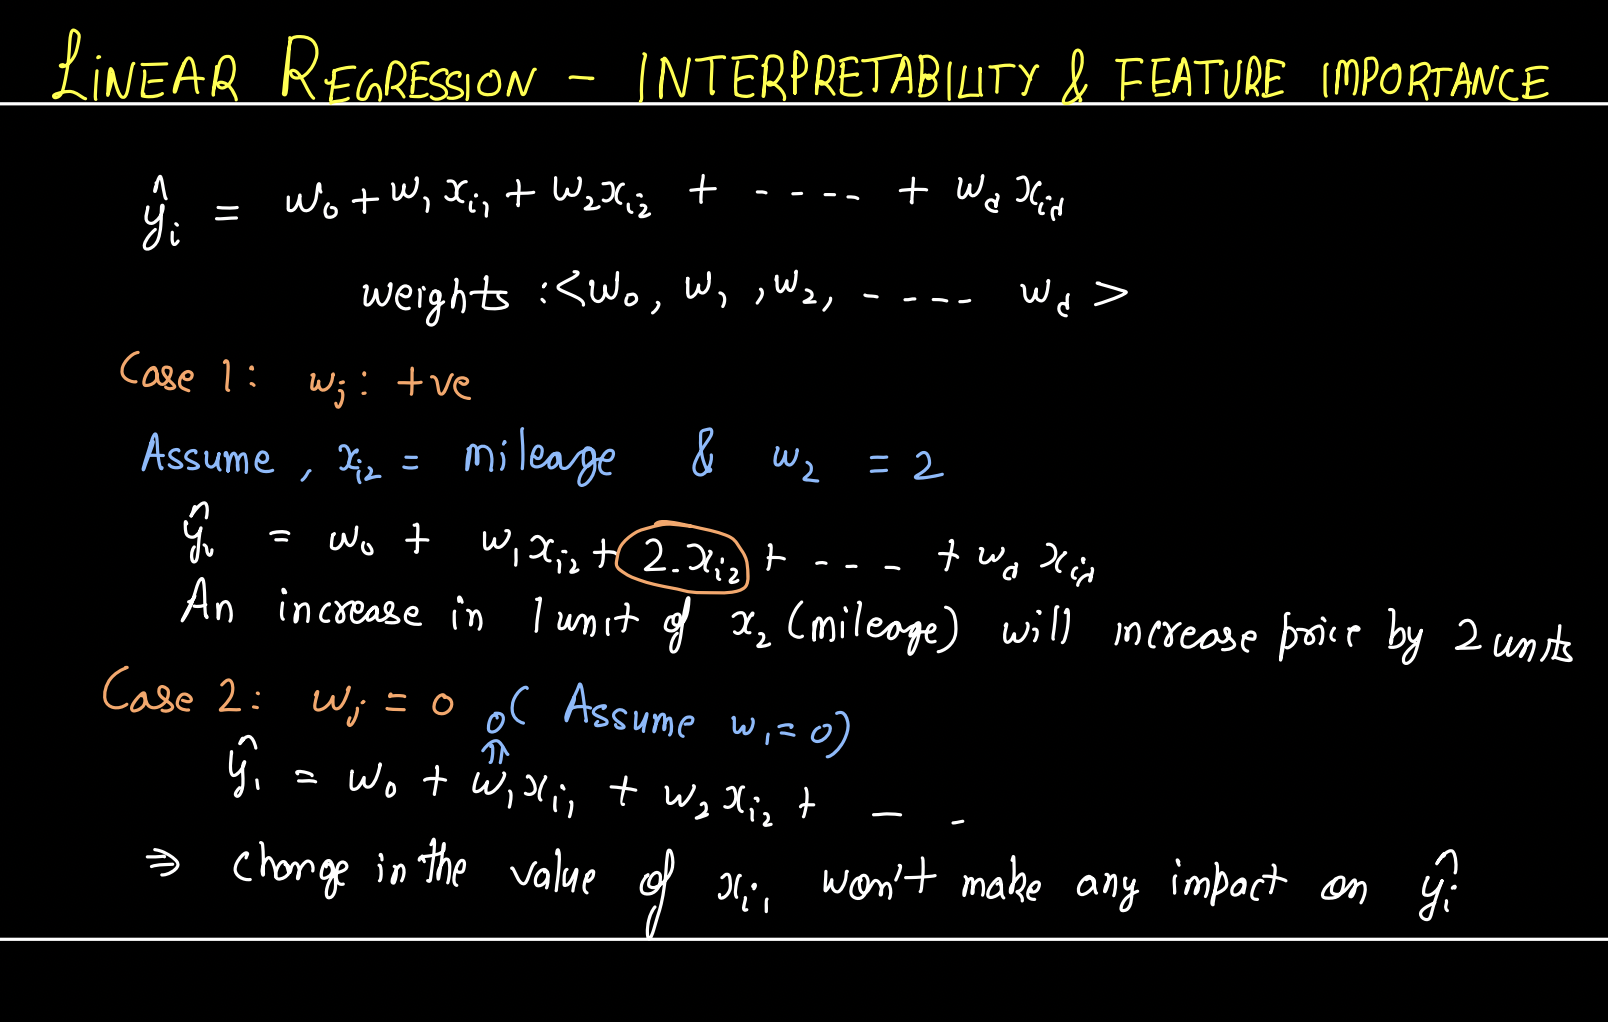

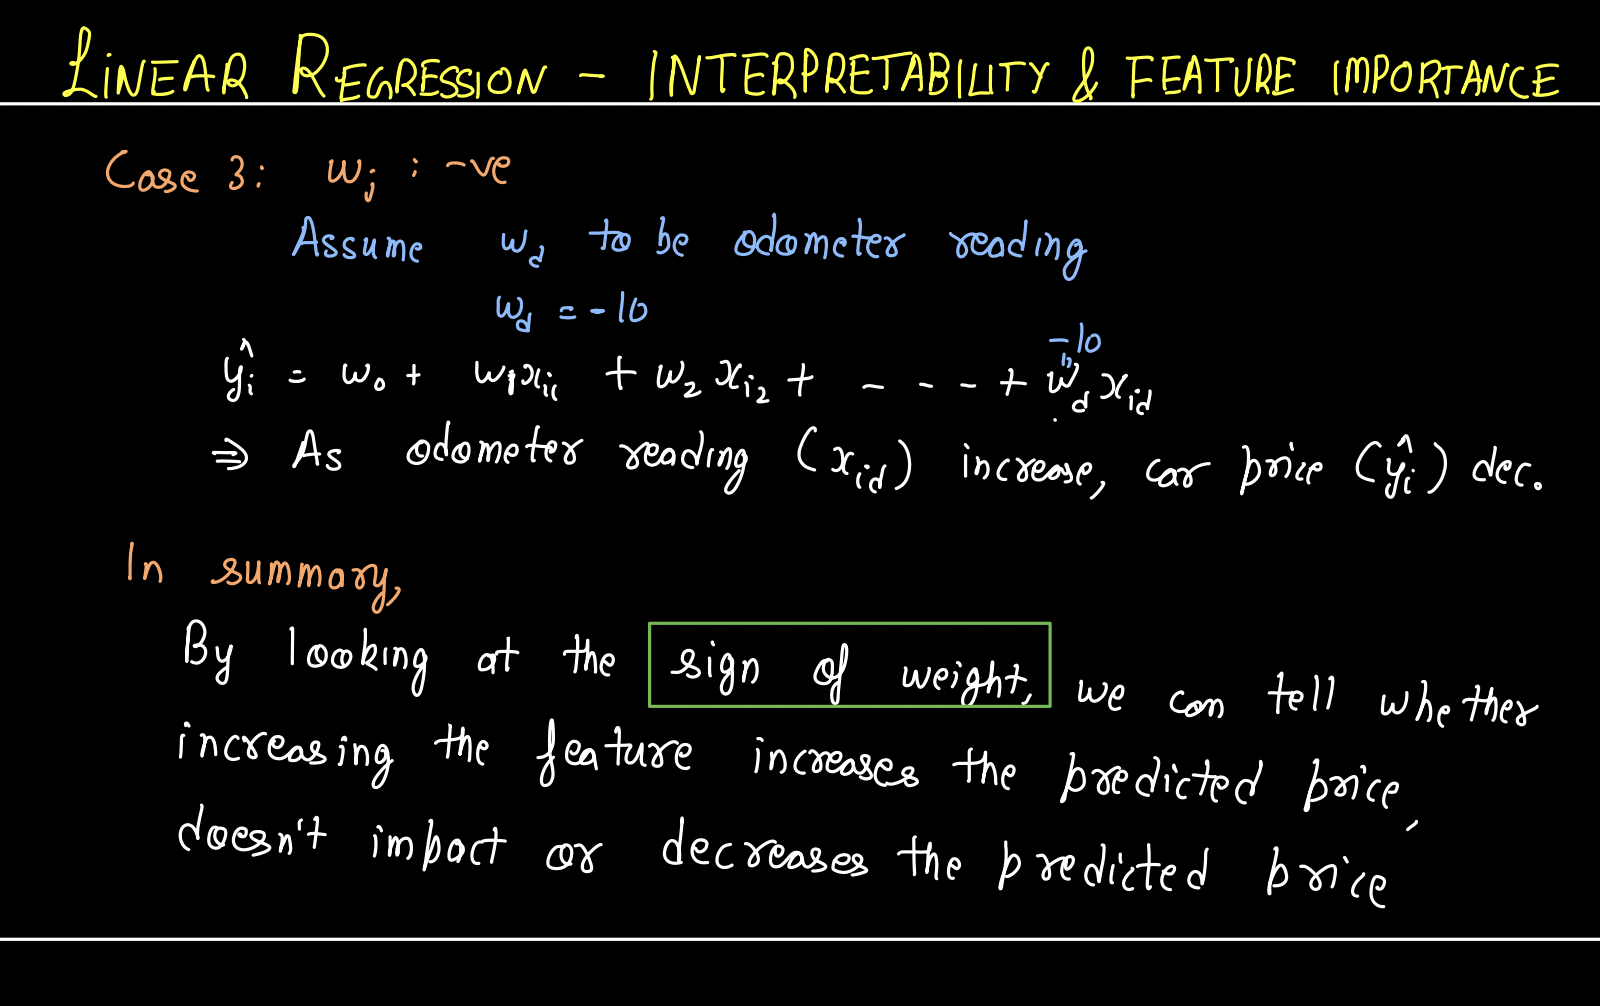

- Our model is `y_i_hat = w0 + w1xi1 + w2xi2 + .... + wdxid`
- w0, w1, ... wd are weights
- Let's assume we trained the model using the historical data and we got the weights
- We have weights corresponding to each of the feature fi
- Notation:
  - i -> to represent datapoint (xi - ith datapoint)
  - j -> to represent dimension (xij - jth dimension of ith datapoint)
- Weights are just coefficients
- `y_i_hat` is our predicted price


***

**First aspect**
- Now, **Case-1: wj is +ve**
  - What does it mean when wj is positive ?
  - Assume w2 is mileage and weight w2 corresponding to it is 2
  - If there is increase in mileage by 1 unit, the predicted price will increase by 2 units
  - An increase the feature will increase your y_i_hat

- **Case 2 : wj = 0**
  - When wj is 0, no matter how much the feature value changes, there will be no impact y_i_hat or predicted price value. (feature value * 0 = 0)

- **Case 3 : wj is -ve**
  - Assume wd is -10  and xid is odometer reading
  - As the odometer reading increases, the predicted price value will decrease (-10 * odometer reading)


- Just by looking at the sign of the weight, we can tell whether increasing the feature will increase the price/doesn't impact or decrease the predicted price.

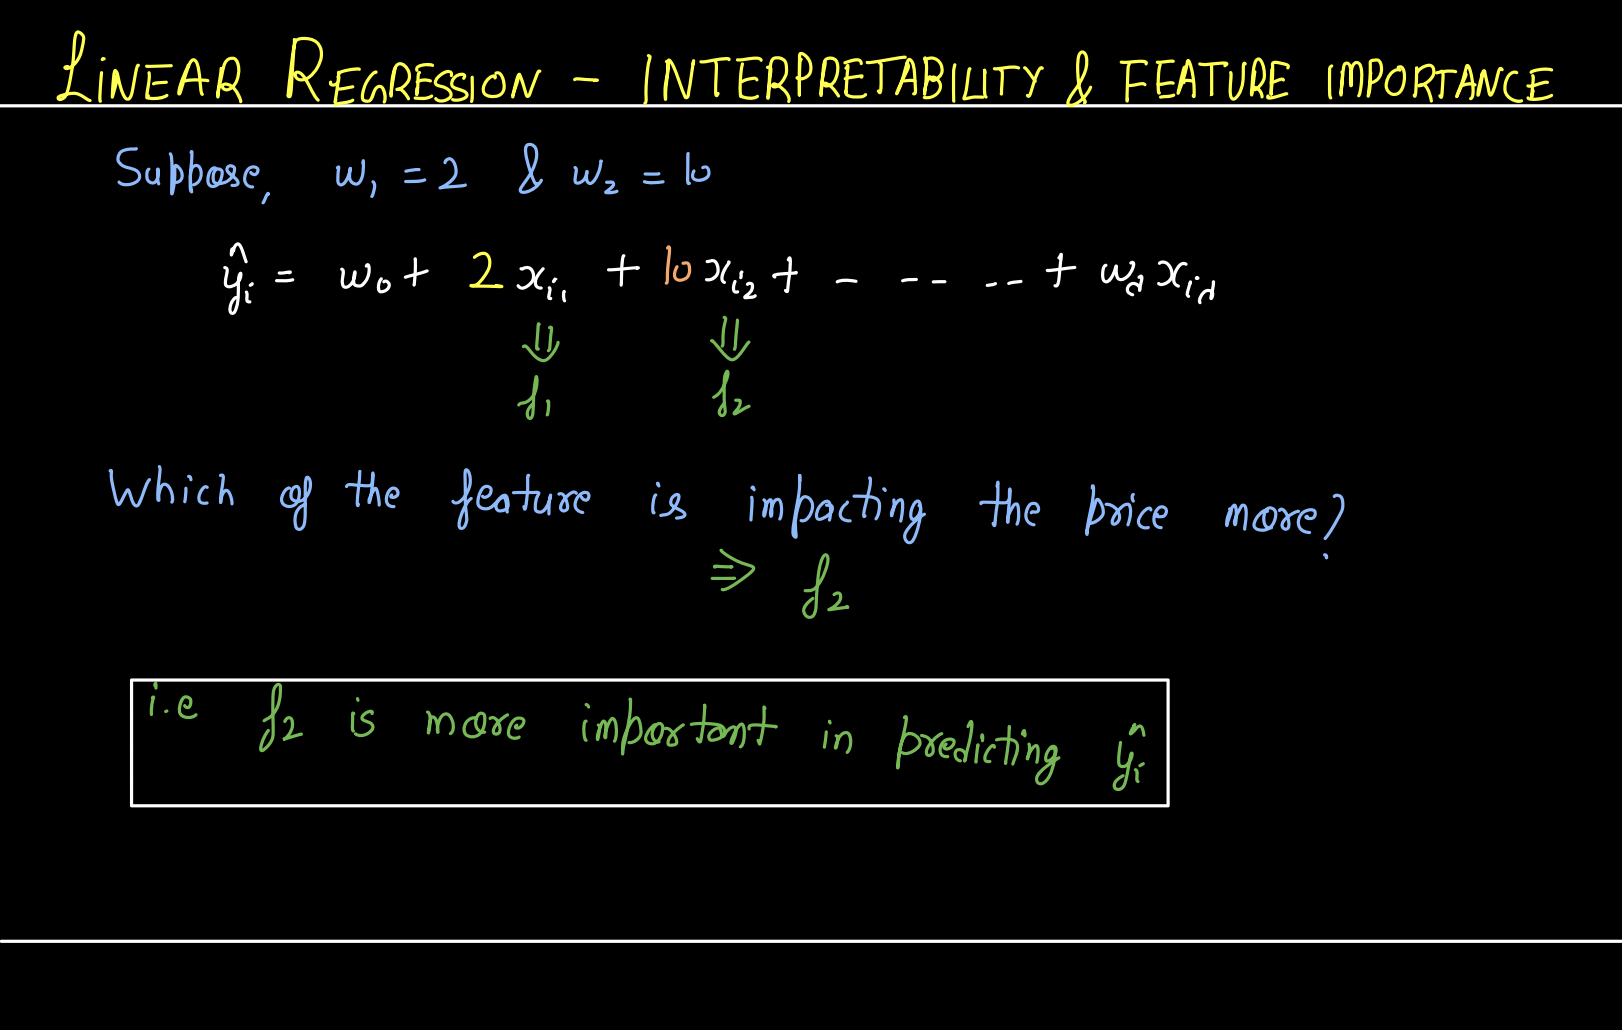

- **Second Aspect**
  - Suppose w1 is 2 and w2 is 10
  - As feature1 increases, predicted price increases.
  - As feature2 increases, predicted price also increases
  - But when feature1 increases by 1 unit, predicted price increases by 2 units. When feature2 increases by 1 unit, predicted price increases by 10 units.
  - **Which feature is impacting the price more ?** Obviously feature2.
  - So, feature2 is more important or contributes more in predicting the price.


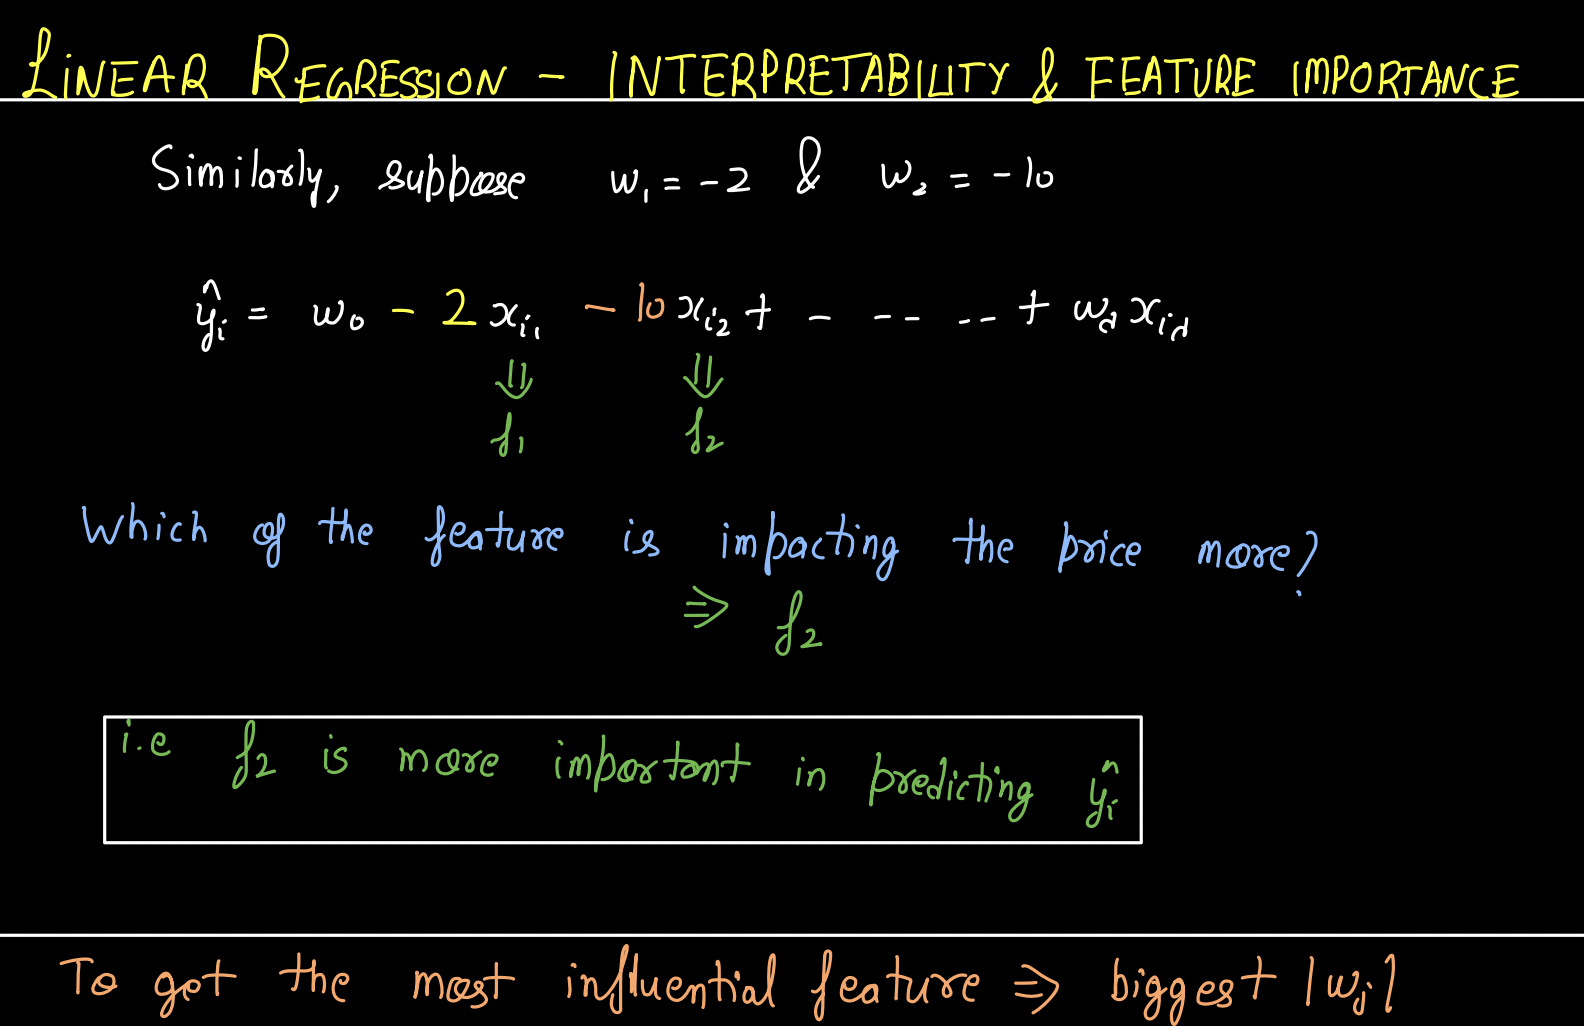

- Let's take exactly opposite example
- Assume w1 is -2 and w2 is -10
- In this case, if f1 increases by 1 unit, price reduces by 2 unit. Similarly, if f2 increases by 1 unit, price reduces by 10 units
- Even in this case, f2 is more important in predicting the price
- If we want most important or most influential feature, all i have to do is take absolute value of weights and get the largert weight.
- But there is an issue with this approach, let's look into it.

#### Issue with absolute weight approach

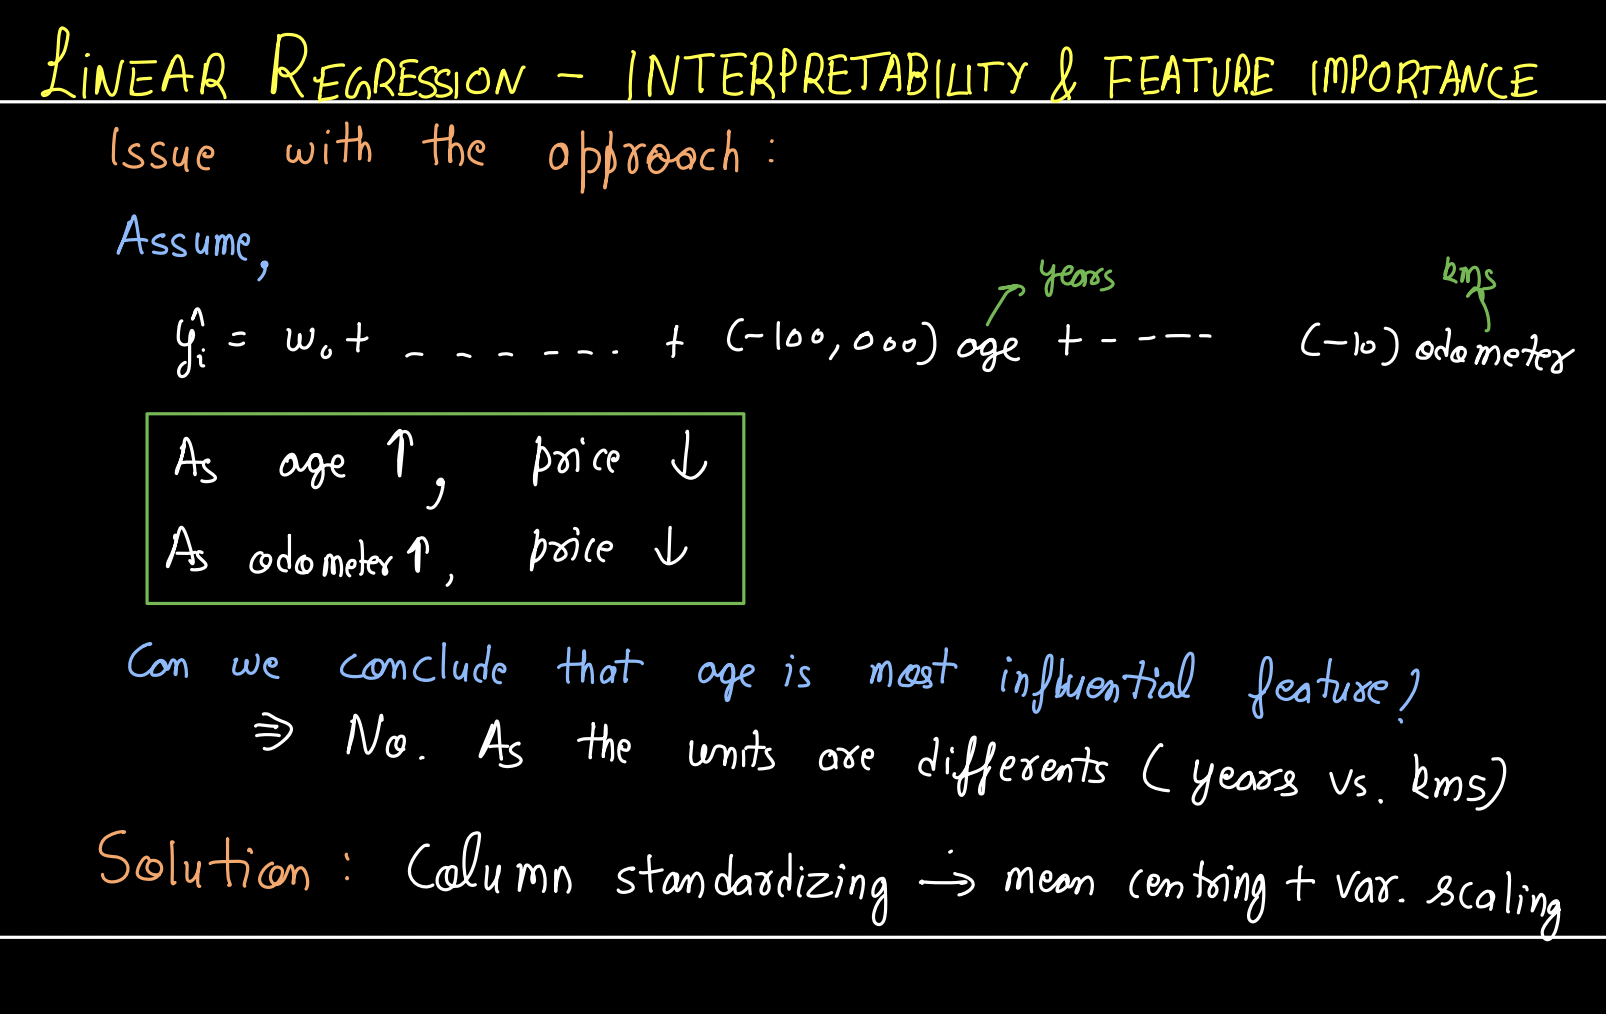

- Suppose `y_i_hat  - wo + ..... + (-100,000)*age + .... + (10)* odometer`.
- If age of car increases by 1 unit, the price drop by 100,000 units.
- If odometer reading increases by 1 unit, the price drops by 10 units.
- If we think that largest absolute value of weight creates most impact, we may conclude that age is the more influential feature than odometer.
- But age is measured in years and odometer is measured in kilometers.
- How can we compare age with kms ? We can't.
- Weights of features are function of units in which we have the data.
- **How do we solve this?** => **Standardize** the data
- For each feature, we do mean centering and variance scaling.

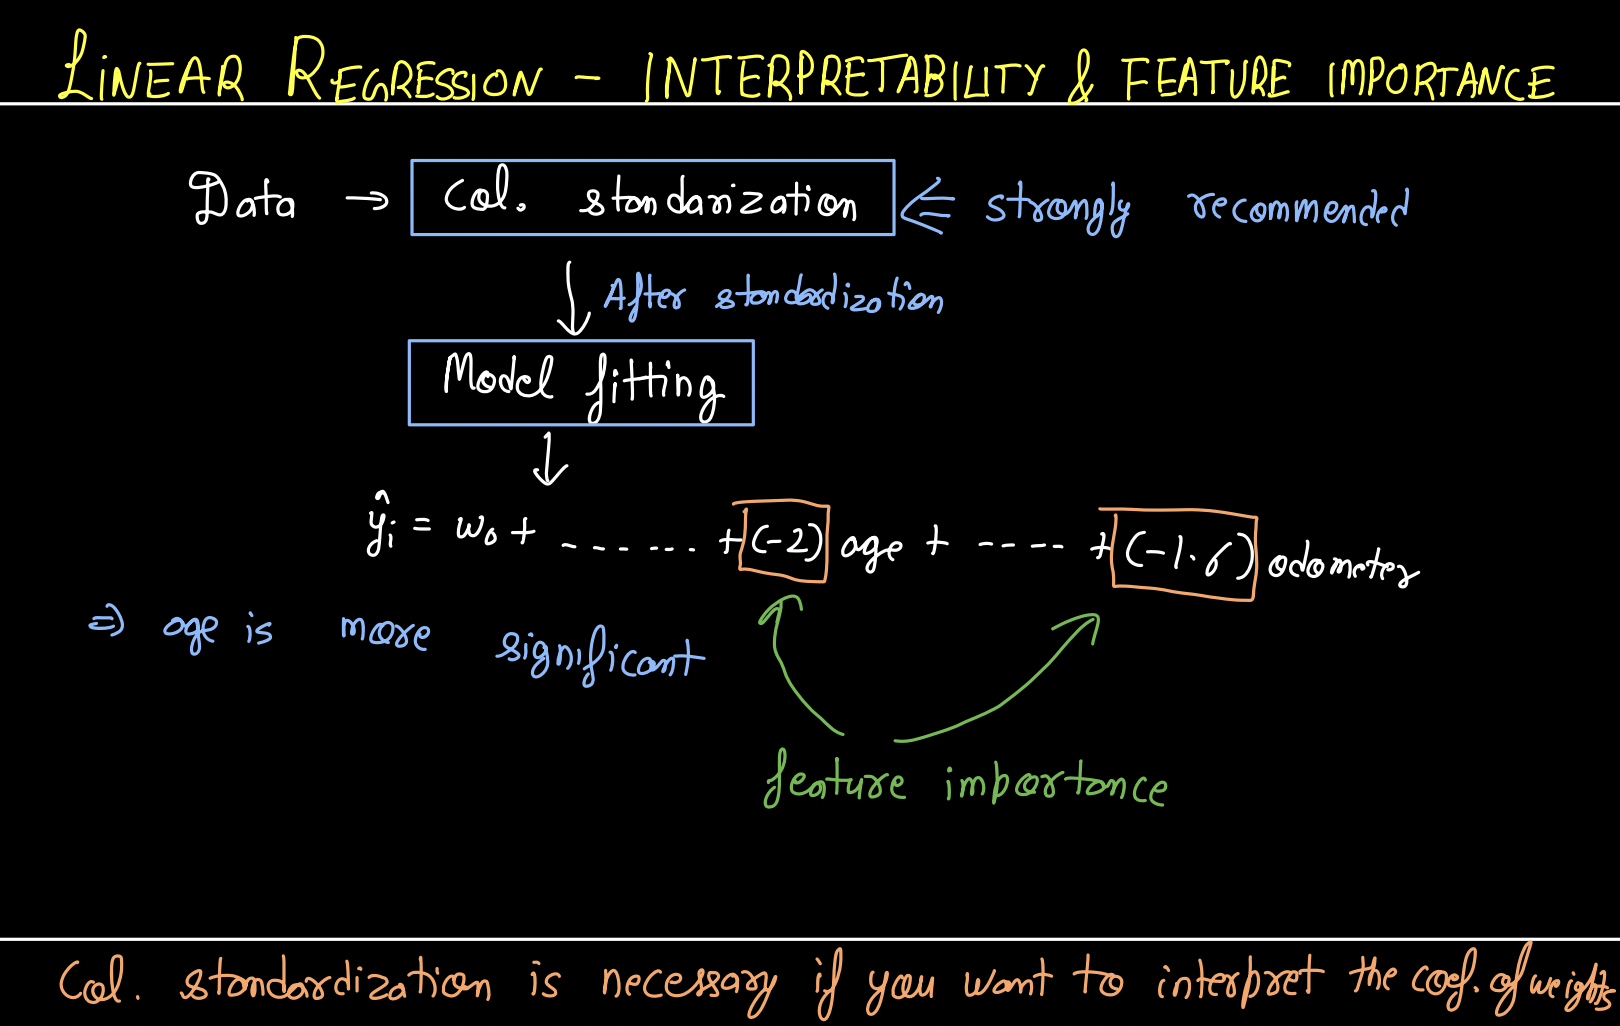

- Now, let's say we standardizated our data, fit a model on it and got our feature weights.
- Let's say feature coef of age is -2 and 1.6 for odometer.
- Now, can we compare the feature coef. ? Can we say age is more influential than odometer? Yes
- Column standardized is not mandatory but recommended
- If you want to interpret the coef. of weights for feature importance, we have to column standardize the data.
- If you don't standardize data, you can't compare weights with each other but each individual weight will tell you how it impacts the y_i_hat or predicted price in this case
- For example: Assume case where we did not standardize data if feature is age and weight is -100,000. Then weight coef is telling us that if age increases by 1 unit, price will decrease by 100,000 units.
- For feature importance, standardization is must
- For model interpretibility(how feature is impact predicted value), standardization isn't required.

Note: You standardize the data. You find the weights using optimization.

P.s - Standardization also makes sure GD behaves properly i.e. it converges fast.


#### Question: How do we standardize future unseen data ?

Ans: Use the mean and std dev of feature_j calculated using train time to standardize data at test time.

**QUIZ-4**

Suppose that we have N independent variables (X1,X2… Xn) and dependent variable is Y. Now Imagine that you are applying linear regression by fitting the best fit line using least square error on this data.

You found that correlation coefficient for one of it’s variable(Say X1) with Y is -0.95.

Which of the following is true for X1?

1. Relation between the X1 and Y is weak
2. Relation between the X1 and Y is strong
3. Relation between the X1 and Y is neutral
4. Correlation can’t judge the relationship

**ANSWER**
2. Relation between the X1 and Y is strong

**EXPLANATION**
- The absolute value of the correlation coefficient denotes the strength of the relationship.
- Since  absolute correlation is very high it means that the relationship is strong between X1 and Y.